# Lending Club Case Study - Exploratory  Data Analysis

# Notes

- Remove rows with current loan status
- loan_amnt, funded_amnt, funded_amnt_inv
- Consider only loan_amnt - because need to decide before approval
- Data Understanding
- Data cleaning
- Data Analysis
- Recommendations 
- Data Cleaning
- Check the percentage of missing values
- Drop columns with high percentage of missing values
- Perform imputations for less missing percentage values columns (Identify correct metric)
- Median for outliers and mean for no outliers and mode for categorical data
- Drop rows where the missing percentage is quite high

- Drop columns having single value as data as it has no influence on the decision

- For interest rate values are like 6.5%, do data cleaning and convert it into float data
- For Employment length create your own rule and mention the assumptions (required float datatype)

- Don't use variables which shows the behaviour of the applicants during the loan period
- Use only variables that are presented when the applications was made

- Three types of variables
- - related to the applicant (demographic variables such as age, occupation, employment details, etc)
- - Loan characteristics (amount of loan, interest rate, purpose of loan etc)
- - Customer behavior (those which are generated after the loan is approved)

- Customer behavior are not available at the time of loan application, thus they cannot be used as predictors
- Loan status with current to be removed and tag other two as 0 and 1 for easy and clean analysis
- Use cusotmer behavior data for others/past loan of the applicants collected from bureau orgs, drop current loan customer behavior

### Few important variables

- loan amnt
- term
- interest rate
- grade
- subgrade
- annual income
- purpose of loan
- DTI (Debt to income)
- Emp_length
- Loan_Date (Month)
- Home_Ownership
- Verification_status 
- - Income Verified (pay slips, tax returns) 
- - Income source verified (1st party vendors has checked) 
- - Not verified

### Customer behavior variables

- delinq_2yrs
- earlies_cr_line
- inq_last_6mnths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

- Customer behavior variables are not available at the time of loan application and cannot be used as predictors
- variables such as acc_now_delinq, chargeoff_with_12months etc (which are related to the applicants past loans) are avaiable from the credit bureau

- Skip Description Variable (Need NLP)


### Univariate Analysis
### Bivariate Analysis

## Importing Necessary Libraries

- Pandas for reading, writing and manipulating csv data
- Numpy for numerical calculations
- Matplotlib and Seaborn for visualization

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Reading the CSV file

In [191]:
df = pd.read_csv('loan/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Removing column id and member id as it has no signficance in predicting whether the applicant will default or not

In [192]:
del df['id']
del df['member_id']

Lisnting all the columns

In [193]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=109)

- delinq_2yrs
- earlies_cr_line
- inq_last_6mnths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

Printing all the information, shape and metrics of the dataframe

In [194]:
print(df.info())
print(df.shape)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 109 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(74), int64(11), object(24)
memory usage: 33.0+ MB
None
(39717, 109)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

Finding all the columns having missing values

In [195]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 109, dtype: int64

Finding columns with missing values with their respective percentage

In [196]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
mths_since_last_delinq has 64.66248709620567% missing values
mths_since_last_record has 92.98537150338646% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
next_pymnt_d has 97.12969257496789% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
mths_since_last_major_derog has 100.0% missing values
annual_inc_joint has 100.0% missing values
dti_joint has 100.0% missing values
verification_status_joint has 100.0% missing values
tot_coll_amt has 100.0% missing values
tot_cur_bal has 100.0% missing values
open_acc_6m has 100.0% missing values
open_il_6m has 100.0% missing values
open_il_12m has 100.0% missing valu

Dropping all the columns having more than 50% missing values

In [197]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, 



Printing information and shape of the dataframe after dropping columns having more than 50% missing values

In [198]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Printing all the columns having missing values less than 50% out of the remaining 52 columns

In [199]:
# print(df.isnull().sum())

# print('\n')

print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 6.19130347206486% missing values
emp_length has 2.7066495455346598% missing values
desc has 32.58050708764509% missing values
title has 0.02769594883802995% missing values
revol_util has 0.12589067653649977% missing values
last_pymnt_d has 0.17876476068182967% missing values
last_credit_pull_d has 0.005035627061459991% missing values
collections_12_mths_ex_med has 0.14099755772087974% missing values
chargeoff_within_12_mths has 0.14099755772087974% missing values
pub_rec_bankruptcies has 1.75491603091875% missing values
tax_liens has 0.09819472769846982% missing values


### Handling each columns with missing values

Dropping column 'desc' which has loan description provided by the borrower as it contains large string and would require text processing and NLP to extract meaningful insight

In [200]:
df = df.drop('desc',axis=1)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Analyzing 'emp_title' column in order to find if it is useful or not for EDA

In [202]:
print(df['emp_title'].value_counts())
print(df['emp_title'].unique())

print(len(df['emp_title'].unique()))

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
28821


- Skipping emp_title has it has to many unqiue values (more than 28000) and would require text processing

Analyzing 'emp_length' column in order to find if it is useful or not for EDA

In [203]:
print(df['emp_length'].value_counts())
print(df['emp_length'].unique())

print(len(df['emp_length'].unique()))

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
12


In [204]:
df['emp_length'].isnull().sum() / len(df) * 100

2.7066495455346575

Removing records for which emp_length is null as it just 2% of the entire data
We could impute the records by find the mode and replacing it with the null values but decided not to as it may create bias

In [205]:
df = df[~df['emp_length'].isnull()]

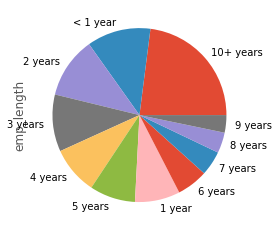

In [206]:
df['emp_length'].value_counts().plot.pie()
plt.show()

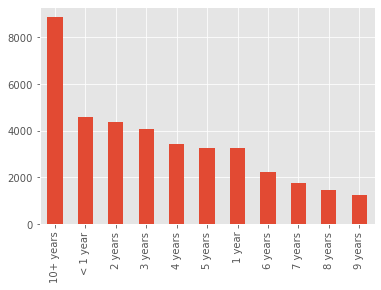

In [207]:
df['emp_length'].value_counts().plot.bar()
plt.show()

Analyzing 'title' column in order to find if it is useful or not for EDA


In [208]:
print(df['title'].value_counts())
print(df['title'].unique())

print(len(df['title'].unique()))


Debt Consolidation             2144
Debt Consolidation Loan        1691
Personal Loan                   641
Consolidation                   511
debt consolidation              486
                               ... 
Shannon's personal loan           1
credit card finally gone!!!       1
Taxes 2011                        1
Dc                                1
JAL Loan                          1
Name: title, Length: 19148, dtype: int64
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
19149


- Skipping title has it has to many unqiue values (more than 19000) and would require text processing

In [209]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [210]:
print(df['pub_rec_bankruptcies'].value_counts())
print(df['pub_rec_bankruptcies'].unique())
print(df['pub_rec_bankruptcies'].isnull().sum())

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
[ 0.  1.  2. nan]
697


Dropping records having null values for column 'pub_rec_bankruptcies' as it just 1% of the entire data
We could fill the null values by using the mode but since the value 0 bankruptices occured is more than 35000 it would have no signfinance adding 697 more records

In [211]:
df['pub_rec_bankruptcies'].isnull().sum() / len(df) * 100

1.8037368666218103

In [212]:
df = df[~df['pub_rec_bankruptcies'].isnull()]

Printing all the columns having missing values

In [213]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
emp_title has 3.681644485439449% missing values
title has 0.026353933324557488% missing values
revol_util has 0.12386348662538182% missing values
last_pymnt_d has 0.17393595994201405% missing values
last_credit_pull_d has 0.0026353933324543277% missing values
collections_12_mths_ex_med has 0.0052707866649086554% missing values
chargeoff_within_12_mths has 0.0052707866649086554% missing values


Printing all the columns having number of unique values

In [214]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
pymnt_plan                        1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        81
last_credit_pull_d               97
last_pymnt_d                     97
int_rate                    

- Dropping columns having just one unique value
- Dropping columns having customer behavior after the loan has been sanctioned 
- Dropping columns having requirement of complex text processing
- Dropping columns like URL which have no signfinance in predicting if the applicant will default
- Keeping columns which are available at the time of application not the columns which are indicating behavior after the loan is sanctioned

In [215]:
columnsToRemove = ['tax_liens','delinq_amnt',
                   'chargeoff_within_12_mths','acc_now_delinq',
                   'application_type','pymnt_plan','policy_code',
                   'initial_list_status','collections_12_mths_ex_med',
                   'url','total_pymnt',
                   'total_pymnt_inv','total_rec_int',
                   'last_pymnt_amnt','revol_bal',
                   'funded_amnt_inv','total_rec_prncp',
                   'recoveries', 'collection_recovery_fee',
                   'total_rec_late_fee','out_prncp_inv',
                   'out_prncp', 'revol_util',
                   'funded_amnt','last_pymnt_d',
                   'last_credit_pull_d', 'issue_d',
                   'title', 'emp_title']

In [216]:
df = df.drop(columnsToRemove,axis=1)

Printing the information of the dataframe after data cleaning

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37945 non-null  int64  
 1   term                  37945 non-null  object 
 2   int_rate              37945 non-null  object 
 3   installment           37945 non-null  float64
 4   grade                 37945 non-null  object 
 5   sub_grade             37945 non-null  object 
 6   emp_length            37945 non-null  object 
 7   home_ownership        37945 non-null  object 
 8   annual_inc            37945 non-null  float64
 9   verification_status   37945 non-null  object 
 10  loan_status           37945 non-null  object 
 11  purpose               37945 non-null  object 
 12  zip_code              37945 non-null  object 
 13  addr_state            37945 non-null  object 
 14  dti                   37945 non-null  float64
 15  delinq_2yrs        

We are left with 22 columns including our target column 'loan_status' to analyze and perform EDA 

In [218]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

## Analysis

Starting with our target column 'loan_status'

In [219]:
df['loan_status'].isnull().sum()

0

Printing the unique values present and their count

In [220]:
df['loan_status'].value_counts()

Fully Paid     31566
Charged Off     5281
Current         1098
Name: loan_status, dtype: int64

Dropping records containing values 'Current' or loan status as current as this applicants cannot help us to understand whether the new applicant will default or not.
Assuming 'Current' as the applicants are currently paying back to the Lending club and are not declared as Charged off or Fully Paid applicants

In [221]:
df.drop(df.index[df['loan_status'] == 'Current'], inplace = True)

In [222]:
df['loan_status'].value_counts()

Fully Paid     31566
Charged Off     5281
Name: loan_status, dtype: int64

In [223]:
df.shape

(36847, 22)

In [224]:
charge_off_percent = round((5281 / 36847) * 100,2)
print("Out of 36847 applicants " + str(charge_off_percent) + "% applicants were declared as Charged Off")

Out of 36847 applicants 14.33% applicants were declared as Charged Off


Plotting pie chart and bar chart in order to represent charge off applicants and fully paid applicants

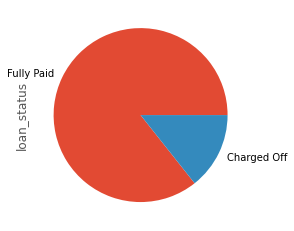

In [225]:
df['loan_status'].value_counts().plot.pie()
plt.show()

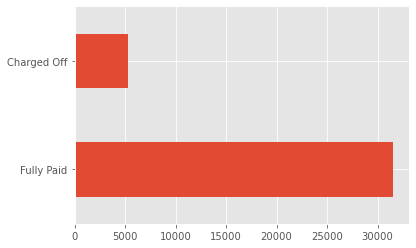

In [226]:
df['loan_status'].value_counts().plot.barh()
plt.show()

In [227]:
df['loan_amnt'].value_counts()

10000    2671
12000    2179
5000     1915
6000     1806
15000    1769
         ... 
27200       1
1625        1
24650       1
19150       1
700         1
Name: loan_amnt, Length: 856, dtype: int64

In [228]:
df['loan_amnt'].describe()


count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

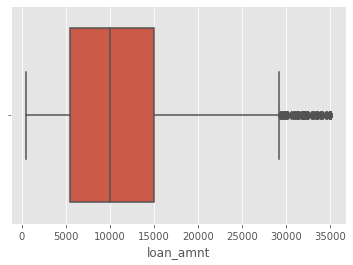

In [229]:
sns.boxplot(df['loan_amnt'])
plt.show()

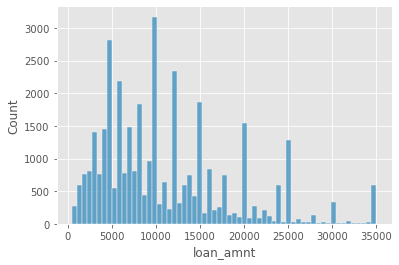

In [230]:
sns.histplot(df['loan_amnt'])
plt.show()

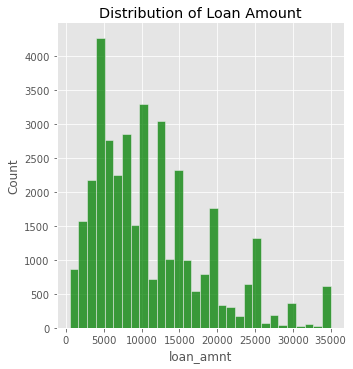

In [231]:
sns.displot(df['loan_amnt'],bins=30,color = 'g')
plt.title("Distribution of Loan Amount")
plt.show()

In [265]:
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,12236.347283,8103.456528,1000.0,6000.0,10000.0,16950.0,35000.0
Fully Paid,31566.0,10958.130584,7223.977380,500.0,5400.0,9600.0,15000.0,35000.0


<AxesSubplot:xlabel='loan_status'>

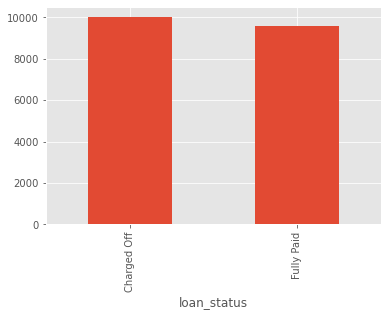

In [236]:
df.groupby(['loan_status'])['loan_amnt'].median().plot.bar()

<AxesSubplot:xlabel='loan_status'>

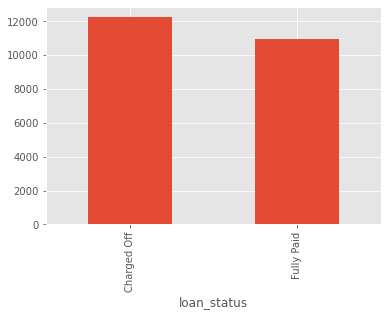

In [237]:
df.groupby(['loan_status'])['loan_amnt'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status'>

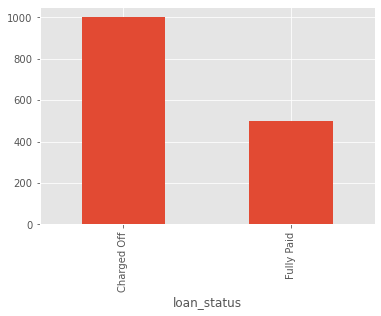

In [243]:
df.groupby(['loan_status'])['loan_amnt'].min().plot.bar()

<AxesSubplot:xlabel='loan_status'>

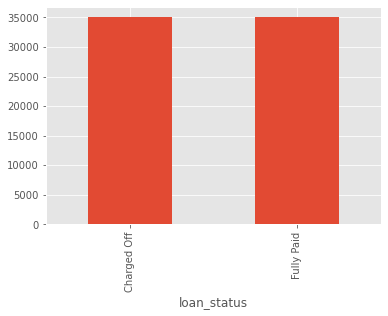

In [244]:
df.groupby(['loan_status'])['loan_amnt'].max().plot.bar()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

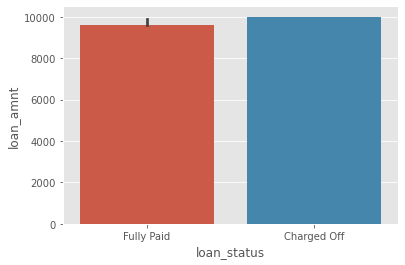

In [248]:
sns.barplot(data=df, x = 'loan_status', y='loan_amnt',estimator= np.median)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

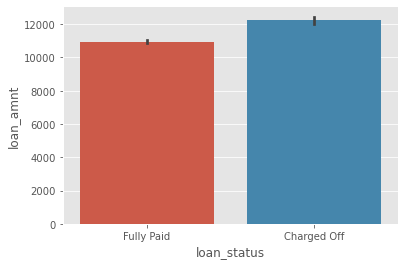

In [266]:
sns.barplot(data=df, x = 'loan_status', y='loan_amnt',estimator= np.mean)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

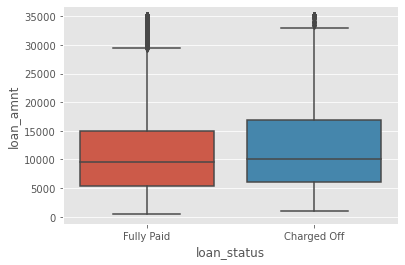

In [249]:
sns.boxplot(df['loan_status'],df['loan_amnt'])

In [250]:
df['loan_amnt_bucket'] = pd.qcut(df['loan_amnt'] , 5, ['VL','L','M', 'H', 'VH'])

In [341]:
hm_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "loan_amnt_bucket",
               values = "loan_amnt",
               aggfunc = np.median)

<AxesSubplot:xlabel='loan_amnt_bucket', ylabel='loan_status'>

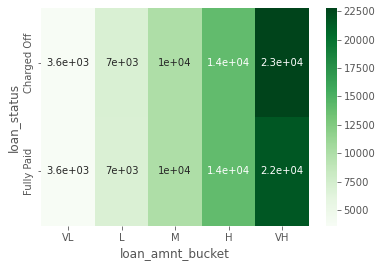

In [342]:
sns.heatmap(hm_amnt,cmap="Greens",annot=True)

In [359]:
hm_amnt.head()

loan_amnt_bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,3600,7000,10000,14000,22750
Fully Paid,3600,6950,10000,14000,21600


In [344]:
hm_amnt.describe()

loan_amnt_bucket,VL,L,M,H,VH
count,2.0,2.000000,2.0,2.0,2.000000
mean,3600.0,6975.000000,10000.0,14000.0,22175.000000
std,0.0,35.355339,0.0,0.0,813.172798
min,3600.0,6950.000000,10000.0,14000.0,21600.000000
25%,3600.0,6962.500000,10000.0,14000.0,21887.500000
50%,3600.0,6975.000000,10000.0,14000.0,22175.000000
75%,3600.0,6987.500000,10000.0,14000.0,22462.500000
max,3600.0,7000.000000,10000.0,14000.0,22750.000000


In [345]:
hm_amnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VL      2 non-null      int64
 1   L       2 non-null      int64
 2   M       2 non-null      int64
 3   H       2 non-null      int64
 4   VH      2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes


<AxesSubplot:xlabel='loan_status'>

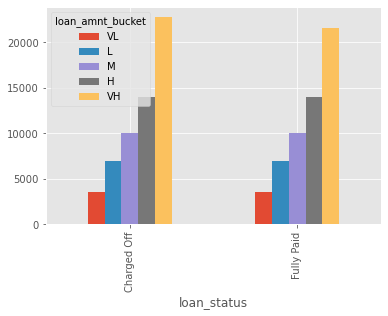

In [361]:
hm_amnt.plot.bar()

In [347]:
df['term'].value_counts()

 36 months    27590
 60 months     9257
Name: term, dtype: int64

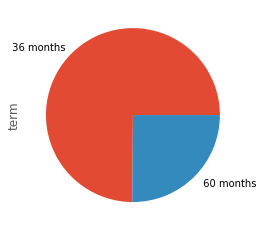

In [348]:
df['term'].value_counts().plot.pie()
plt.show()

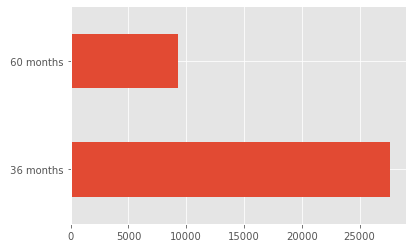

In [240]:
df['term'].value_counts().plot.barh()
plt.show()

In [285]:
df.groupby(['loan_status'])['term'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5281,2,36 months,2955
Fully Paid,31566,2,36 months,24635


In [350]:
df.groupby(['loan_status'])['term'].value_counts()

loan_status  term      
Charged Off   36 months     2955
              60 months     2326
Fully Paid    36 months    24635
              60 months     6931
Name: term, dtype: int64

<AxesSubplot:xlabel='loan_status,term'>

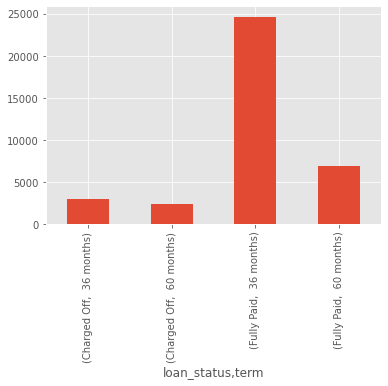

In [354]:
df.groupby(['loan_status'])['term'].value_counts().plot.bar()

In [416]:
term_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "term",
               values = "loan_amnt",
               aggfunc = np.median)

In [418]:
term_amnt.head()

term,36 months,60 months
loan_status,,
Charged Off,8000,15000
Fully Paid,8000,14500


<AxesSubplot:xlabel='loan_status'>

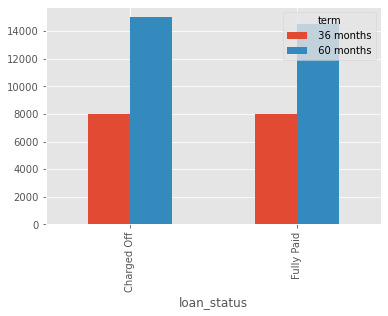

In [417]:
term_amnt.plot.bar()

In [298]:
df['int_rate'].value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
13.84%      1
22.94%      1
24.40%      1
21.48%      1
11.22%      1
Name: int_rate, Length: 336, dtype: int64

In [299]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')

In [300]:
df['int_rate'].value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
13.84      1
22.94      1
24.40      1
21.48      1
11.22      1
Name: int_rate, Length: 336, dtype: int64

In [301]:
df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

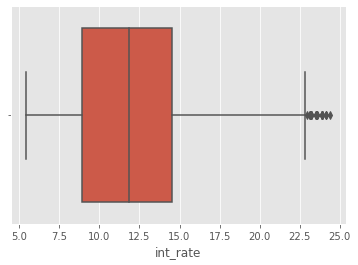

In [302]:
sns.boxplot(df['int_rate'])
plt.show()

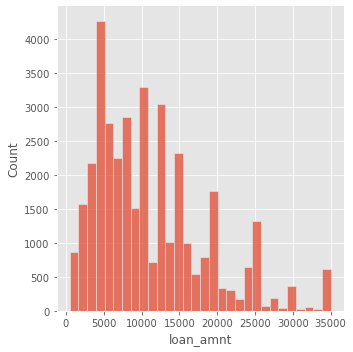

In [305]:
sns.displot(df['loan_amnt'],bins = 30)
plt.show()

In [308]:
df.groupby(['loan_status'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,13.932233,3.652394,5.42,11.49,13.79,16.45,24.40
Fully Paid,31566.0,11.663133,3.609582,5.42,8.59,11.49,14.09,24.11


<AxesSubplot:xlabel='loan_status'>

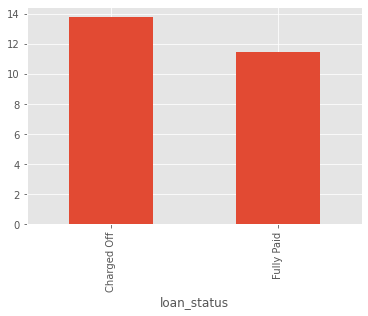

In [366]:
df.groupby(['loan_status'])['int_rate'].median().plot.bar()


<AxesSubplot:xlabel='loan_status'>

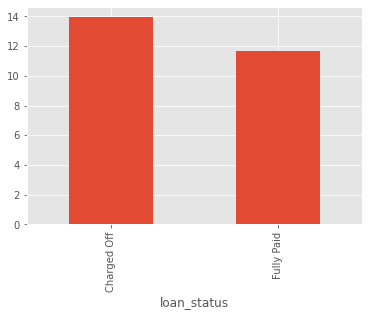

In [367]:
df.groupby(['loan_status'])['int_rate'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status'>

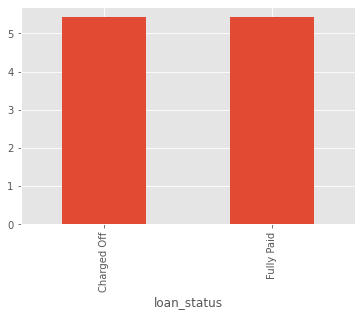

In [368]:
df.groupby(['loan_status'])['int_rate'].min().plot.bar()

<AxesSubplot:xlabel='loan_status'>

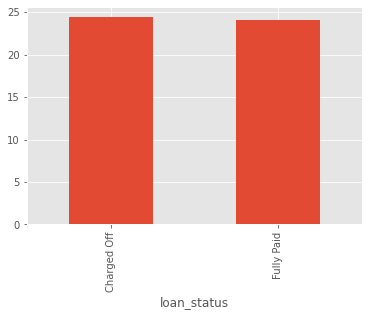

In [369]:
df.groupby(['loan_status'])['int_rate'].max().plot.bar()

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

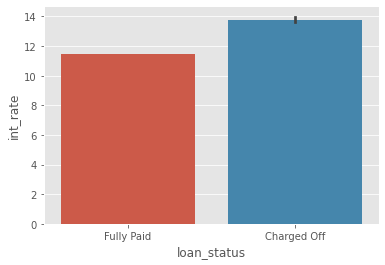

In [370]:
sns.barplot(data=df, x = 'loan_status', y='int_rate',estimator= np.median)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

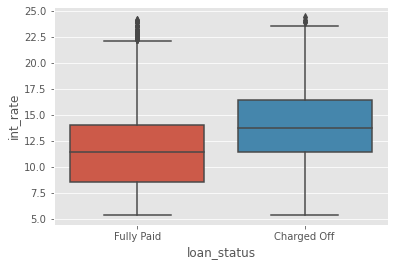

In [371]:
sns.boxplot(df['loan_status'],df['int_rate'])

In [372]:
df['int_rate_bucket'] = pd.qcut(df['int_rate'] , 5, ['VL','L','M', 'H', 'VH'])

In [373]:
hm_intrate = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "int_rate_bucket",
               values = "int_rate",
               aggfunc = np.median)

In [374]:
hm_intrate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Charged Off to Fully Paid
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VL      2 non-null      float64
 1   L       2 non-null      float64
 2   M       2 non-null      float64
 3   H       2 non-null      float64
 4   VH      2 non-null      float64
dtypes: float64(5)
memory usage: 96.0+ bytes


In [375]:
hm_intrate.describe()

int_rate_bucket,VL,L,M,H,VH
count,2.00000,2.000000,2.000000,2.000000,2.000000
mean,7.28000,10.125000,11.875000,13.915000,17.080000
std,0.19799,0.176777,0.021213,0.091924,0.438406
min,7.14000,10.000000,11.860000,13.850000,16.770000
25%,7.21000,10.062500,11.867500,13.882500,16.925000
50%,7.28000,10.125000,11.875000,13.915000,17.080000
75%,7.35000,10.187500,11.882500,13.947500,17.235000
max,7.42000,10.250000,11.890000,13.980000,17.390000


In [377]:
hm_intrate.head()

int_rate_bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,7.42,10.25,11.89,13.98,17.39
Fully Paid,7.14,10.00,11.86,13.85,16.77


In [376]:
hm_intrate.value_counts()

VL    L      M      H      VH   
7.14  10.00  11.86  13.85  16.77    1
7.42  10.25  11.89  13.98  17.39    1
dtype: int64

<AxesSubplot:xlabel='int_rate_bucket', ylabel='loan_status'>

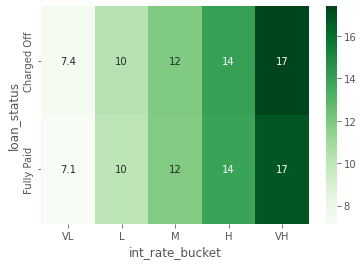

In [378]:
sns.heatmap(hm_intrate,cmap="Greens",annot=True)

<AxesSubplot:xlabel='loan_status'>

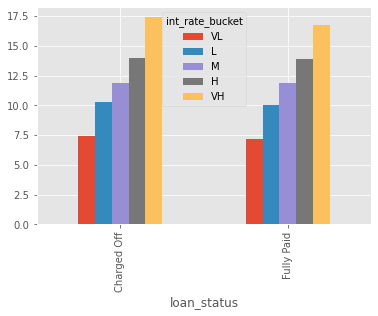

In [379]:
hm_intrate.plot.bar()

In [321]:
df['installment'].value_counts()

311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
287.92     1
157.44     1
606.04     1
550.23     1
99.44      1
Name: installment, Length: 14406, dtype: int64

In [322]:
df['installment'].unique()

array([162.87,  59.83,  84.33, ..., 155.52, 507.46,  99.44])

In [380]:
df['installment'].describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

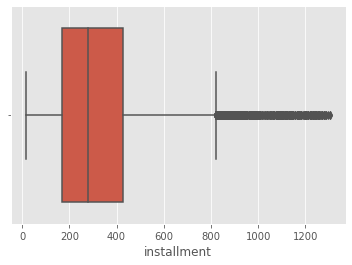

In [381]:
sns.boxplot(df['installment'])
plt.show()

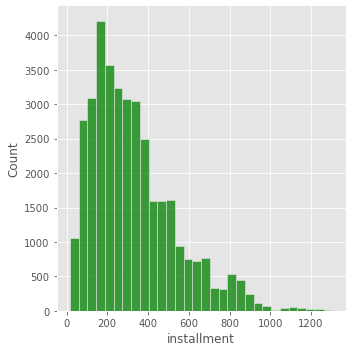

In [382]:
sns.displot(df['installment'],bins=30,color = 'g')

plt.show()

In [383]:
df.groupby(['loan_status'])['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,338.291574,216.140397,22.79,171.4400,296.72,459.600,1305.19
Fully Paid,31566.0,322.419822,207.564341,16.08,166.9025,277.98,424.225,1295.21


<AxesSubplot:xlabel='loan_status'>

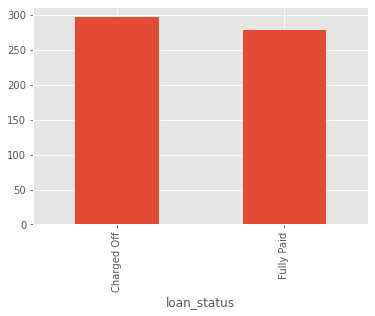

In [384]:
df.groupby(['loan_status'])['installment'].median().plot.bar()

<AxesSubplot:xlabel='loan_status'>

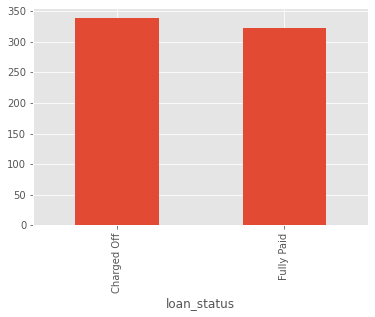

In [385]:
df.groupby(['loan_status'])['installment'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status'>

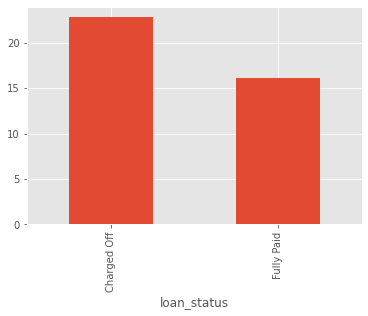

In [386]:
df.groupby(['loan_status'])['installment'].min().plot.bar()

<AxesSubplot:xlabel='loan_status'>

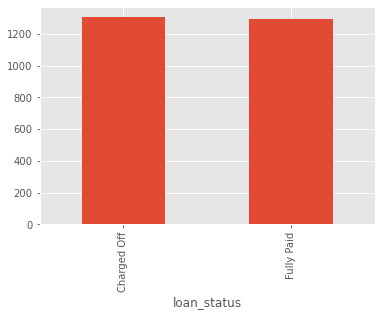

In [387]:
df.groupby(['loan_status'])['installment'].max().plot.bar()

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

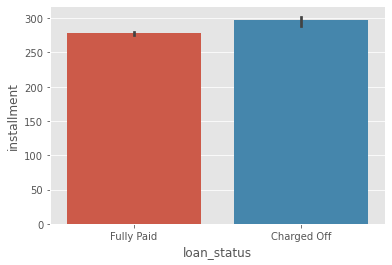

In [388]:
sns.barplot(data=df, x = 'loan_status', y='installment',estimator= np.median)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

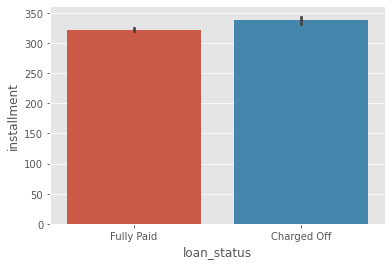

In [389]:
sns.barplot(data=df, x = 'loan_status', y='installment',estimator= np.mean)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

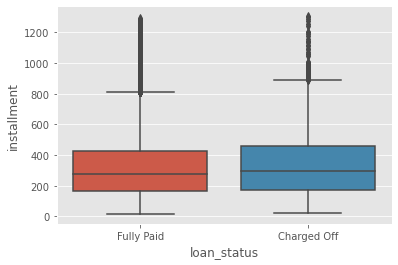

In [390]:
sns.boxplot(df['loan_status'],df['installment'])

In [391]:
df['installment_bucket'] = pd.qcut(df['installment'] , 5, ['VL','L','M', 'H', 'VH'])

In [392]:
hm_instl = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "installment_bucket",
               values = "installment",
               aggfunc = np.median)

<AxesSubplot:xlabel='installment_bucket', ylabel='loan_status'>

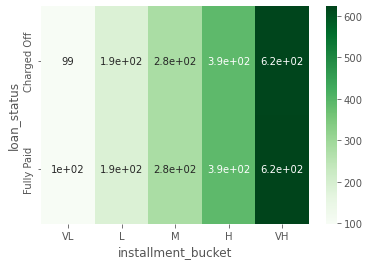

In [393]:
sns.heatmap(hm_instl,cmap="Greens",annot=True)

In [394]:
hm_instl.head()

installment_bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,99.205,187.25,279.61,389.01,619.225
Fully Paid,100.700,187.64,280.00,389.30,623.200


In [395]:
hm_instl.describe()

installment_bucket,VL,L,M,H,VH
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,99.952500,187.445000,279.805000,389.155000,621.212500
std,1.057125,0.275772,0.275772,0.205061,2.810749
min,99.205000,187.250000,279.610000,389.010000,619.225000
25%,99.578750,187.347500,279.707500,389.082500,620.218750
50%,99.952500,187.445000,279.805000,389.155000,621.212500
75%,100.326250,187.542500,279.902500,389.227500,622.206250
max,100.700000,187.640000,280.000000,389.300000,623.200000


<AxesSubplot:xlabel='loan_status'>

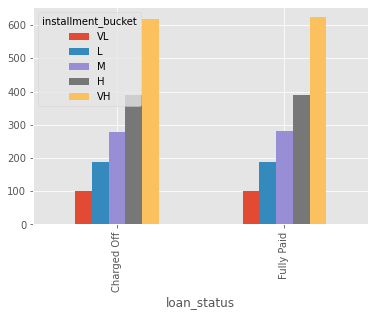

In [396]:
hm_instl.plot.bar()

In [397]:
df['grade'].value_counts()

B    11150
A     9518
C     7486
D     4868
E     2585
F      944
G      296
Name: grade, dtype: int64

<AxesSubplot:ylabel='grade'>

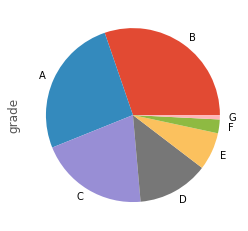

In [398]:
df['grade'].value_counts().plot.pie()

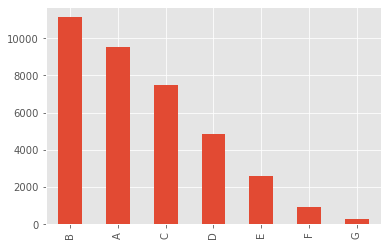

In [400]:
df['grade'].value_counts().plot.bar()
plt.show()

In [401]:
df.groupby(['loan_status'])['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5281,7,B,1326
Fully Paid,31566,7,B,9824


In [406]:
df.groupby(['loan_status'])['grade'].value_counts()

loan_status  grade
Charged Off  B        1326
             C        1254
             D        1052
             E         690
             A         552
             F         307
             G         100
Fully Paid   B        9824
             A        8966
             C        6232
             D        3816
             E        1895
             F         637
             G         196
Name: grade, dtype: int64

<AxesSubplot:xlabel='loan_status,grade'>

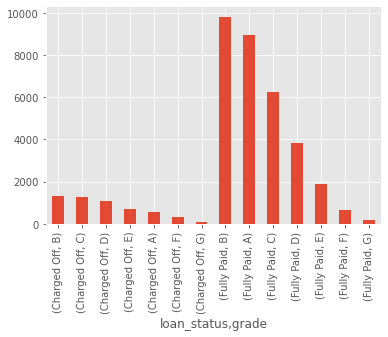

In [407]:
df.groupby(['loan_status'])['grade'].value_counts().plot.bar()

In [413]:
grade_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "grade",
               values = "loan_amnt",
               aggfunc = np.median)

In [414]:
grade_amnt.head()

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7000.0,9962.5,9950.0,10000.0,15000.0,20000.0,19100.0
Fully Paid,7750.0,10000.0,9600.0,10000.0,15000.0,17000.0,23250.0


<AxesSubplot:xlabel='loan_status'>

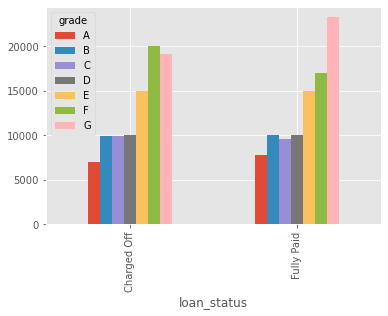

In [415]:
grade_amnt.plot.bar()

In [419]:
df['sub_grade'].value_counts()

A4    2762
B3    2710
A5    2602
B5    2517
B4    2346
C1    1963
B2    1898
C2    1866
A3    1702
B1    1679
C3    1423
A2    1411
D2    1230
C4    1141
C5    1093
D3    1069
A1    1041
D1     888
D4     882
D5     799
E1     702
E2     596
E3     501
E4     410
E5     376
F1     298
F2     223
F3     169
F4     145
F5     109
G1      92
G2      77
G4      54
G3      45
G5      28
Name: sub_grade, dtype: int64

<AxesSubplot:ylabel='sub_grade'>

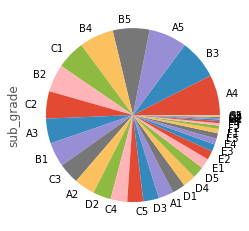

In [420]:
df['sub_grade'].value_counts().plot.pie()

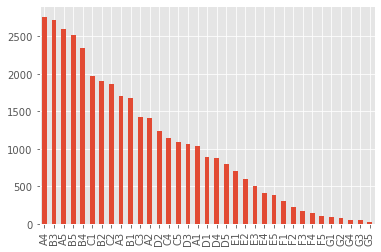

In [421]:
df['sub_grade'].value_counts().plot.bar()
plt.show()

In [422]:
df.groupby(['loan_status'])['sub_grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5281,35,B5,339
Fully Paid,31566,35,A4,2595


In [423]:
df.groupby(['loan_status'])['sub_grade'].value_counts()

loan_status  sub_grade
Charged Off  B5           339
             B3           323
             B4           312
             C1           309
             C2           301
                         ... 
Fully Paid   F5            57
             G2            49
             G4            41
             G3            26
             G5            18
Name: sub_grade, Length: 70, dtype: int64

<AxesSubplot:xlabel='loan_status,sub_grade'>

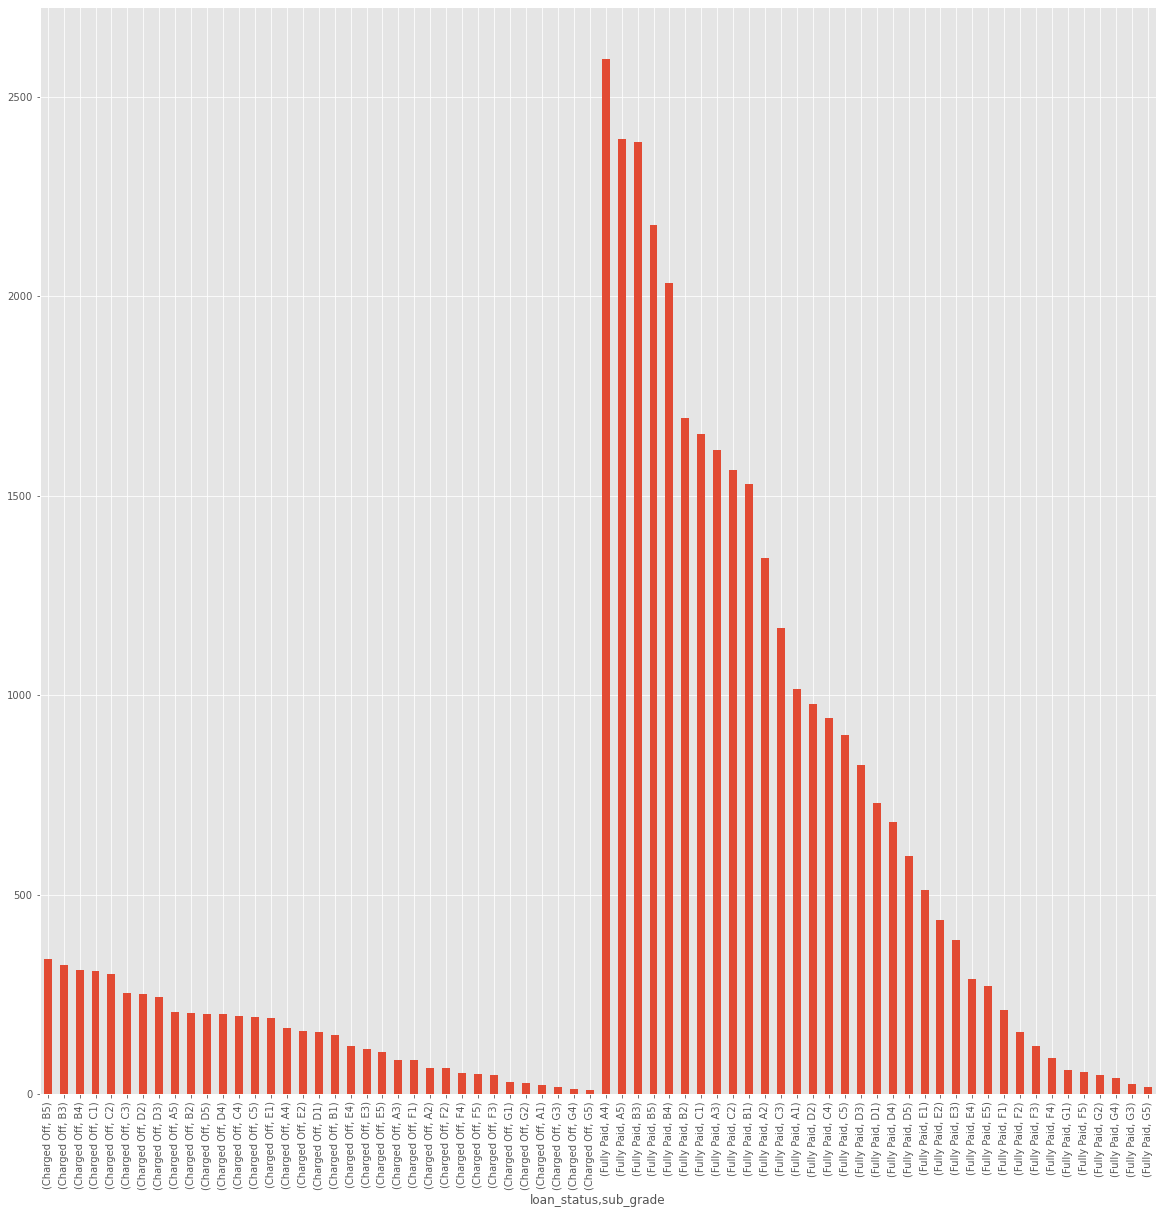

In [427]:
plt.figure(figsize=[20,20])
df.groupby(['loan_status'])['sub_grade'].value_counts().plot.bar()

In [428]:
sub_grade_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "sub_grade",
               values = "loan_amnt",
               aggfunc = np.median)

In [429]:
sub_grade_amnt.head()

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,7250.0,6125.0,8000.0,7000.0,7600.0,8000.0,8000.0,10000.0,10000.0,10000.0,...,20000.0,19000.0,19212.5,20000.0,20250.0,16500.0,19500.0,20000.0,14500.0,18250.0
Fully Paid,6000.0,6500.0,7000.0,8125.0,9000.0,9000.0,9500.0,10000.0,10000.0,10000.0,...,16000.0,15500.0,18000.0,16750.0,20000.0,20337.5,25000.0,20750.0,24000.0,20000.0


<AxesSubplot:xlabel='loan_status'>

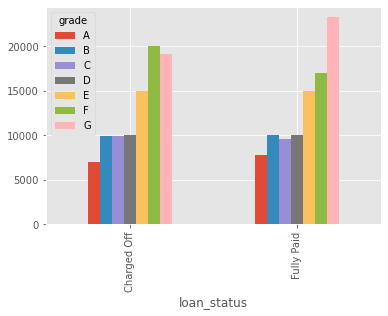

In [430]:
grade_amnt.plot.bar()

In [432]:
df['emp_length'].value_counts()

10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: emp_length, dtype: int64

In [434]:
emplen = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df = df.replace({'emp_length': emplen})

In [435]:
df['emp_length'].value_counts()

10    8369
0     4341
2     4207
3     3951
4     3297
5     3161
1     3077
6     2136
7     1689
8     1410
9     1209
Name: emp_length, dtype: int64

<AxesSubplot:ylabel='emp_length'>

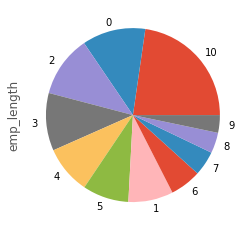

In [436]:
df['emp_length'].value_counts().plot.pie()

<AxesSubplot:>

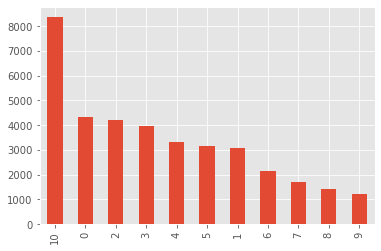

In [437]:
df['emp_length'].value_counts().plot.bar()


In [438]:
df.groupby(['loan_status'])['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,5.096951,3.593354,0.0,2.0,5.0,9.0,10.0
Fully Paid,31566.0,4.939175,3.544334,0.0,2.0,4.0,9.0,10.0


In [439]:
df.groupby(['loan_status'])['emp_length'].value_counts()

loan_status  emp_length
Charged Off  10            1303
             0              612
             2              556
             3              549
             5              454
             4              450
             1              442
             6              301
             7              258
             8              200
             9              156
Fully Paid   10            7066
             0             3729
             2             3651
             3             3402
             4             2847
             5             2707
             1             2635
             6             1835
             7             1431
             8             1210
             9             1053
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='loan_status,emp_length'>

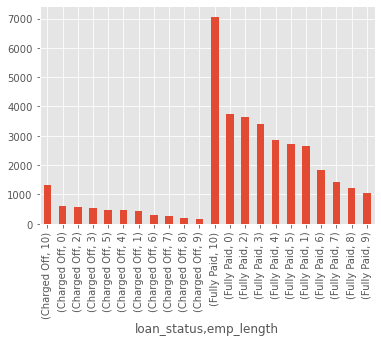

In [440]:
df.groupby(['loan_status'])['emp_length'].value_counts().plot.bar()

In [441]:
emplen_amnt = pd.pivot_table(data = df,
               index = "loan_status",
               columns = "emp_length",
               values = "loan_amnt",
               aggfunc = np.median)

In [442]:
emplen_amnt.head()

emp_length,0,1,2,3,4,5,6,7,8,9,10
loan_status,,,,,,,,,,,
Charged Off,8000.0,8500.0,8937.5,10000.0,10000.0,10000.0,11100.0,11600.0,11750.0,12000.0,13200.0
Fully Paid,8000.0,8000.0,8050.0,9000.0,9600.0,9900.0,10000.0,10000.0,10000.0,10000.0,10200.0


<AxesSubplot:xlabel='loan_status'>

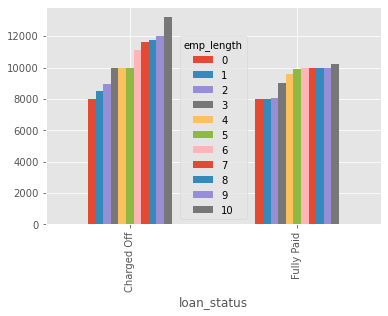

In [443]:
emplen_amnt.plot.bar()

In [445]:
df['emp_length'].describe()

count    36847.000000
mean         4.961788
std          3.551783
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

<AxesSubplot:xlabel='emp_length'>

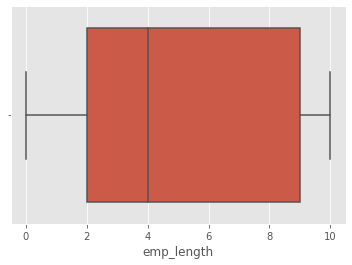

In [446]:
sns.boxplot(df['emp_length'])

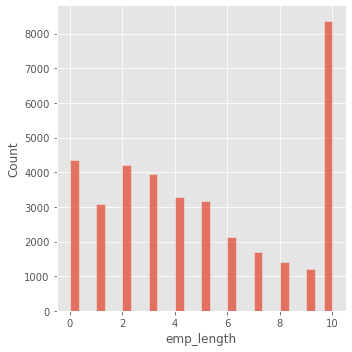

In [447]:
sns.displot(df['emp_length'],bins = 30)
plt.show()

<AxesSubplot:xlabel='loan_status'>

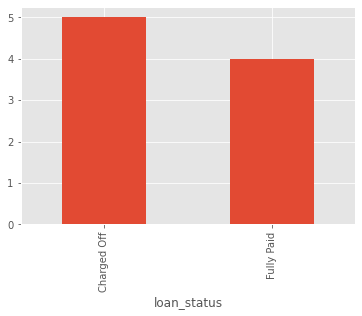

In [448]:
df.groupby(['loan_status'])['emp_length'].median().plot.bar()

<AxesSubplot:xlabel='loan_status'>

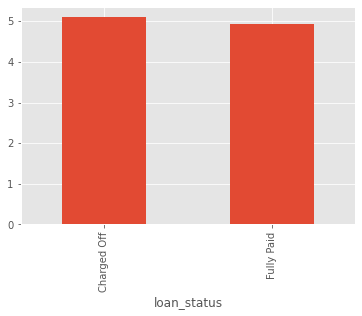

In [449]:
df.groupby(['loan_status'])['emp_length'].mean().plot.bar()

<AxesSubplot:xlabel='loan_status', ylabel='emp_length'>

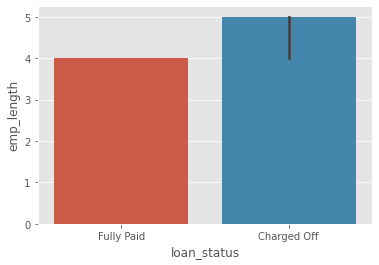

In [451]:
sns.barplot(data=df, x = 'loan_status', y='emp_length',estimator= np.median)

In [453]:
df['home_ownership'].value_counts()

RENT        17698
MORTGAGE    16343
OWN          2708
OTHER          98
Name: home_ownership, dtype: int64